# Dylan Forsythe
Last update: 03-19-2023

## Research Interests

Upon being introduced to the applications of statistics, 
I developed a passion for data science as it allows me to express the creative side that I never knew I had. I am constantly being introduced to various methods and models that allow me to explore data and extract information that is hidden behind a table of numbers and letters. Creating the graphs, tables, charts, and reports from the data is where all that creativity goes. The creativity and freedom here grants me the ability to find hidden stories in the data that are not apparent without the steps involved with data analysis.

For this project, my interest is in learning about the popularities of some of the sports over the history that the sport has been played in the Olympics. So far, I'm mostly interested in winter olympic sports like snowboarding and skating because I recently learned how to snowboard, and figure skating simply because I think its a pretty sport to watch. I am hoping to find the information necessary to answer my questions by looking at how many participants are in the Olympics in each of these sports in each year.

I am also keen on finding out how many athletes actually win a medal in their first appearance at an Olympic games. This should be fairly easy to find if there exists a column that lists each athletes first year of participation. With this info, all I will need to do is check if they won a medal in that year.

# Research Question 1
> **How have the popularities of similar sports (i.e. amount of participants / competitors) changed over time in the Olympics?**

This question peaks my interest because I was curious about how the popularity of sports has changed over time.

# Research Question 2

>**How many athletes obtained a medal in their first appearance in the Olympics?**

This question interests me because I was curious to know the percentage of athletes that have won a medal in their first appearance at the Olympic games.

---

# Exploratory Data Analysis for Question 1
**Exploration Plan:** To find out this information, I will need to get an idea of what columns each dataframe has. Then my plan is to first merge all of the together and drop all of the columns that I think are irrelevent information for this question. I should also find how many unique sports there are to get an idea of what kind of visualization I could use.

Since my research question is looking at "similar" sports, I should write a function that will allow me to specify which sports I want to look at. Having this function will help with the repeatability of my analysis in case I want to analyze and compare many similar sports.

Then, to do this comparison, I'll group this new dataframe by year, Olympic host location, and the sport which will count how many participants there were per sport in each year.

In [1]:
### Import libraries

import sys
sys.path.append("../code")
import project_functions_dylan as pf

### project_functions_dylan contains all of the other imports and functions used in this notebook

In [2]:
### Set the base theme for seaborn graphs

pf.sns.set_theme(style='darkgrid',font_scale=1.2)

In [3]:
### Read raw data and save into seperate df's

OlympicResultsDF = pf.pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_results.csv')
OlympicHostsDF = pf.pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv')
OlympicMedalsDF = pf.pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv')
OlympicAthletesDF = pf.pd.read_csv('../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_athletes.csv')

In [4]:
### Checking the shape, heads, and column names of each dataframe to get an idea of what information each one contains.
### I have commented some of these out because it's a lot of ugly looking info

print(OlympicResultsDF.shape)
OlympicResultsDF.head(5)
# print(OlympicResultsDF.columns)

(162804, 15)


,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [5]:
print(OlympicHostsDF.shape)
OlympicHostsDF.head(5)
# print(OlympicHostsDF.columns)

(53, 7)


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [6]:
print(OlympicMedalsDF.shape)
OlympicMedalsDF.head(5)
# print(OlympicMedalsDF.columns)

(21697, 12)


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohullah-nikpai,Rohullah NIKPAI,Afghanistan,AF,AFG
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohullah-nikpai,Rohullah NIKPAI,Afghanistan,AF,AFG
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,NaN,https://olympics.com/en/athletes/jan-d-boersma,Jan D. BOERSMA,Netherlands Antilles,AN,AHO
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/taoufik-makhl...,Taoufik MAKHLOUFI,Algeria,DZ,ALG
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/taoufik-makhl...,Taoufik MAKHLOUFI,Algeria,DZ,ALG


In [7]:
print(OlympicAthletesDF.shape)
OlympicAthletesDF.head(5)
# print(OlympicAthletesDF.columns)

(75904, 7)


,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


## Findings:
* The OlympicResultsDF dataframe has 162804 rows and 15 columns, many NaN values though they don't seem to have any importance to my research question.
* The OlympicHostsDF dataframe has 53 rows and 7 columns but the only information that seems relevant (if at all) would be 'game_year' or 'game_name'
* The OlympicMedalsDF dataframe has 21697 rows and 12 columns
* The OlympicAthletesDF dataframe has 75904 rows and 7 columns with very helpful information on each athlete

Since the OlympicResultsDF has the most rows, I'll use that as the first dataframe and merge the rest into it on columns that they share. Then drop all of the columns that I will not use for my research.

In [8]:
### Merging all the dataframes

Research_df_merged_full = pf.pd.merge(OlympicResultsDF, OlympicAthletesDF, how='outer')
Research_df_merged_full = pf.pd.merge(Research_df_merged_full, OlympicMedalsDF, how='outer')
Research_df_merged_full = pf.pd.merge(Research_df_merged_full, OlympicHostsDF, left_on='slug_game', right_on='game_slug')

#Research_df_merged_full

In [9]:
### Dropping the columns I don't need and viewing the unique sports

Research1_df_merged_filtered = Research_df_merged_full.drop(columns=['medal_type','first_game','athlete_full_name',
                                                      'game_slug','athletes','value_unit','value_type',
                                                      'games_participations','athlete_url','participant_type',
                                                      'rank_equal','rank_position','event_gender','country_name',
                                                      'country_code','country_3_letter_code','athlete_year_birth','bio',
                                                      'athlete_medals','participant_title','game_end_date',
                                                      'game_start_date','game_season','slug_game'])
#Research1_df_merged_filtered

### To see the exact name of the sports in the whole dataframe:

Research1_df_merged_filtered.discipline_title.unique()

array(['Curling', 'Freestyle Skiing', 'Short Track Speed Skating',
       'Snowboard', 'Ski Jumping', 'Figure skating', 'Luge', 'Ice Hockey',
       'Biathlon', 'Alpine Skiing', 'Cross Country Skiing',
       'Speed skating', 'Nordic Combined', 'Bobsleigh', 'Skeleton',
       'Shooting', 'Diving', 'Canoe Sprint', 'Football',
       'Artistic Swimming', 'Handball', 'Rugby Sevens', 'Triathlon',
       'Table Tennis', 'Volleyball', 'Basketball', 'Cycling Track',
       'Fencing', 'Badminton', 'Water Polo', 'Tennis',
       'Artistic Gymnastics', 'Judo', 'Archery', 'Baseball/Softball',
       'Equestrian', 'Athletics', 'Swimming', 'Sailing', 'Rowing',
       '3x3 Basketball', 'Rhythmic Gymnastics', 'Hockey',
       'Beach Volleyball', 'Skateboarding', 'Cycling Mountain Bike',
       'Cycling Road', 'Boxing', 'Cycling BMX Racing', 'Surfing',
       'Canoe Slalom', 'Marathon Swimming', 'Trampoline Gymnastics',
       'Taekwondo', 'Sport Climbing', 'Wrestling', 'Golf',
       'Cycling BMX Fre

Now that I have a list of all unique sports that have ever been in the Olympics, I can create the function to isolate which sports I want to compare. This is done as part of the analysis later on.

---

# Exploratory Data Analysis for Question 2
Using a copy of the merged dataframe created for the first research question, I'll drop different columns that are not relevent to this question. I'll also drop all of the rows that contain a NaN value because any athlete that didn't win a medal, will have an NaN value in the 'medal_type' column.
Then by looking at the rows where the 'first_game' column and the 'game_name' column match values, we find the participants that won any medal in their first appearance.

In [10]:
Research2_df = Research_df_merged_full.copy()

RQ2_First_medal = (Research2_df[Research2_df['first_game'] == Research2_df['game_name']]
                   .drop(columns=['discipline_title', 'game_slug', 'slug_game', 'event_title', 'participant_type', 
                           'athletes', 'rank_equal', 'rank_position', 'country_name', 'country_code', 
                           'country_3_letter_code', 'athlete_url', 'value_unit', 'value_type', 
                           'games_participations', 'athlete_year_birth', 'athlete_medals', 'bio', 'event_gender', 
                           'participant_title', 'game_end_date', 'game_start_date', 'game_season'])
                   .rename(columns={'medal_type' : 'Medal Won', 'athlete_full_name' : 'Athlete Name',
                     'first_game' : 'First Game', 'game_location' : 'Host Country', 
                     'game_name' : 'Game Name','game_year' : 'Year'})
                   .dropna()
                   .reset_index(drop=True))
RQ2_First_medal

,Medal Won,Athlete Name,First Game,Host Country,Game Name,Year
0,GOLD,Birk RUUD,Beijing 2022,China,Beijing 2022,2022
1,SILVER,Colby STEVENSON,Beijing 2022,China,Beijing 2022,2022
2,GOLD,Ryan REGEZ,Beijing 2022,China,Beijing 2022,2022
3,GOLD,Ailing Eileen GU,Beijing 2022,China,Beijing 2022,2022
4,GOLD,Ailing Eileen GU,Beijing 2022,China,Beijing 2022,2022
...,...,...,...,...,...,...
7990,SILVER,Pavlos PAVLIDIS,Athens 1896,Greece,Athens 1896,1896
7991,GOLD,Pantelis KARASEVDAS,Athens 1896,Greece,Athens 1896,1896
7992,GOLD,John BOLAND,Athens 1896,Greece,Athens 1896,1896
7993,BRONZE,Konstantinos PASPATIS,Athens 1896,Greece,Athens 1896,1896


**NOTES:**  
* This dataframe shows the athletes that won a medal in their first appearance to an Olympic games. The answer to my second research question is thus 7995 athletes.

* This table doesn't seperate the amount that won each medal type which would also be something I can find out. My initial thoughts is that there are considerably more bronze medal winner than silver medal winners, and more silver medal winners than gold medal winners.

In [11]:
### Finding how many won a gold medal in their first appearance

Gold = RQ2_First_medal[RQ2_First_medal['Medal Won'] == 'GOLD']
Gold.shape

(2500, 6)

In [12]:
Silver = RQ2_First_medal[RQ2_First_medal['Medal Won'] == 'SILVER']
Silver.shape

(2537, 6)

In [13]:
Bronze = RQ2_First_medal[RQ2_First_medal['Medal Won'] == 'BRONZE']
Bronze.shape

(2958, 6)

## Observations
By seperating the First_medal dataframe into 3 seperate dataframes based on the medal type, I have found that the distribution between gold, silver, and bronze medal winners is not what I would have expected.

The distribution is:

| Medal | Number |
| ---- | ---- |
| Gold | 2500 |
| Silver | 2537 |
| Bronze | 2958 |


In the next portion of data analysis, I can plot these results as a simple bar plot.

---

<h3 align="center">End of EDA</h3> 

---

# Data Analysis 
## Question 1.1: How has the popularity of snowboarding and all of the skiing events changed over time?

In [14]:
### Since we only want to look at the sports of Snowboarding and each skiing discipline, 
### I want to make a dataframe containing only these sports

Snow_and_Ski_df = pf.sportpopularity(Research1_df_merged_filtered, 'Snowboard','Biathlon', 'Freestyle Skiing', 'Ski Jumping', 
                                  'Alpine Skiing', 'Cross Country Skiing', 'Nordic Combined')
#Snow_and_Ski_df

In [15]:
### Now I can group this dataframe on year, and sport and count the number of participants

Snow_and_Ski_grouped = Snow_and_Ski_df.groupby(by=['Year', 'Sport'])[['Olympic Name']].count().reset_index()
Snow_and_Ski_grouped.rename(columns={'Olympic Name' : 'Number of Participants'}, inplace=True)
Snow_and_Ski_grouped

,Year,Sport,Number of Participants
0,1924,Cross Country Skiing,91
1,1924,Nordic Combined,37
2,1924,Ski Jumping,40
3,1928,Cross Country Skiing,91
4,1928,Nordic Combined,35
...,...,...,...
121,2022,Cross Country Skiing,736
122,2022,Freestyle Skiing,331
123,2022,Nordic Combined,102
124,2022,Ski Jumping,170


**NOTE:**  
Based on this table, I want the 'Year' column on the x-axis with the 'Number of Participants' on the y-axis, and a line representing each sport. A simple line-plot should portray the differences per year thereby showing how the popularity of each sport has changed over time.

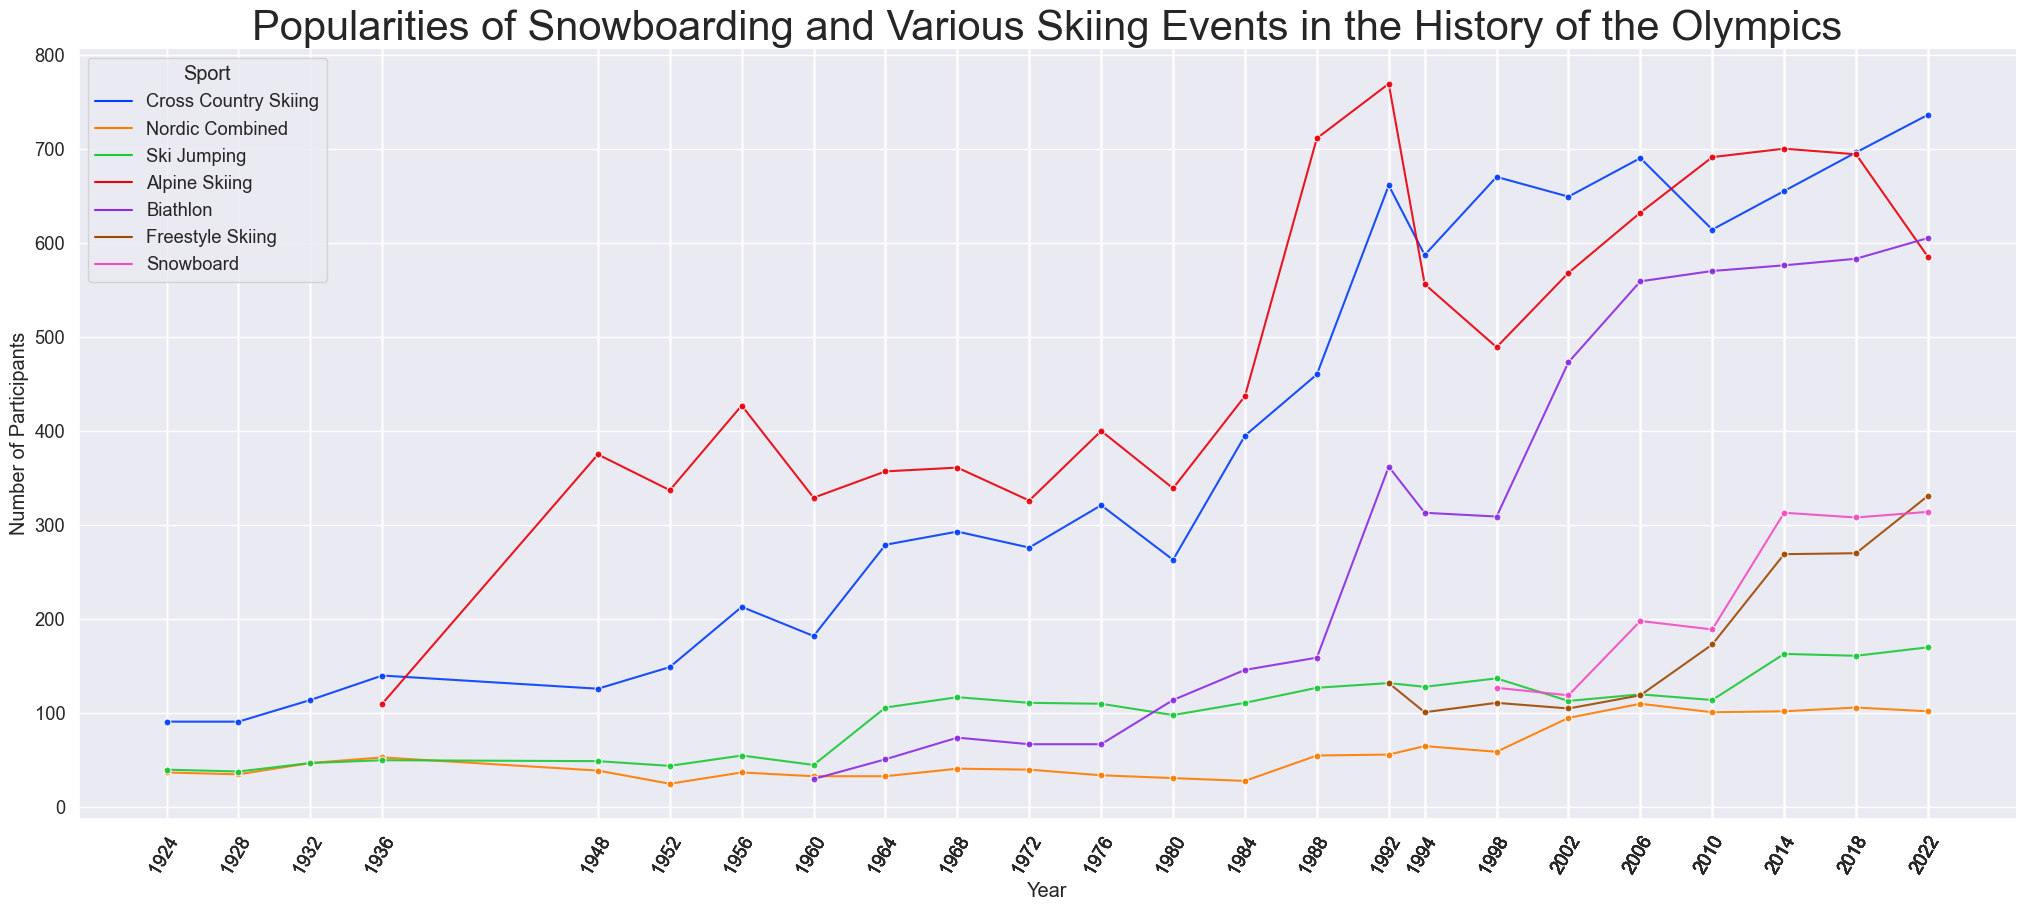

In [16]:
pf.plt.figure(figsize=(25, 10))
RQ1_plot1 = pf.sns.lineplot(data = Snow_and_Ski_grouped, x='Year', y= 'Number of Participants', 
                        alpha= 0.9, hue= 'Sport', marker='.', markersize=10, palette='bright')
pf.sns.despine()
RQ1_plot1.set_xticks(Snow_and_Ski_grouped['Year'])
RQ1_plot1.set_xticklabels(RQ1_plot1.get_xticklabels(), rotation=60, ha= 'right', rotation_mode= 'anchor')
pf.plt.title("Popularities of Snowboarding and Various Skiing Events in the History of the Olympics", fontsize= 30)
pf.plt.legend(loc='upper left', title= 'Sport')
None

## Observations
1. There is no initial data for these sports during the years 1940 and 1944, and these years are missing from the list. This is because World War 2 was occuring during these dates.
1. There was a large increase in popularity for Alpine Skiing between 1936 and 1948, and again from 1984 to 1988.
1. Cross Country Skiing also had a large increase in popularity between 1984 and 1988.
1. Snowboarding was only introduced into the Olympics in 1998 in Nagano, Japan.
1. The Winter Olympics were held in 1992 and 1994 (2-year difference as opposed to the normal 4 years).

---

## Question 1.2: How did the popularity of skating events change over time?

In [17]:
### Using my function to make a dataframe with only the skating related sports

Skating_df = pf.sportpopularity(Research1_df_merged_filtered, 'Short Track Speed Skating', 'Figure skating', 'Speed skating')

In [18]:
### Following the same analysis procedure as my initial question, group by year and sport
Skating_df_grouped = Skating_df.groupby(by=['Year', 'Sport'])[['Olympic Name']].count().reset_index()
Skating_df_grouped.rename(columns={'Olympic Name' : 'Number of Participants'}, inplace=True)
#Skating_df_grouped

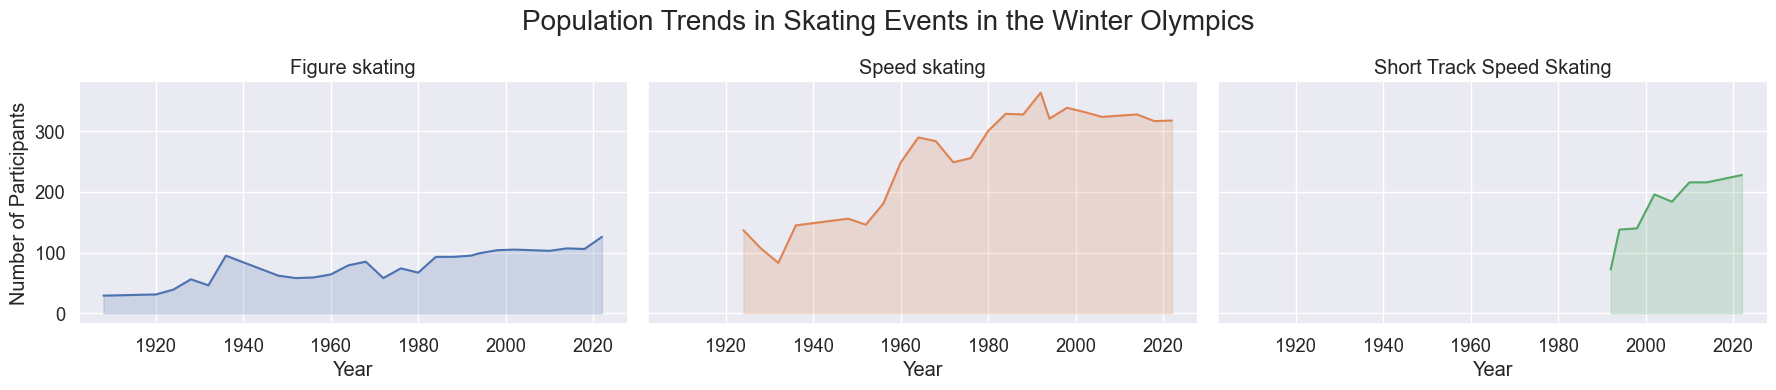

In [19]:
RQ1_facet = pf.sns.FacetGrid(Skating_df_grouped, col='Sport', hue='Sport', col_wrap=3, height=4, aspect=1.5)
RQ1_facet.map(pf.plt.plot, 'Year', 'Number of Participants')
RQ1_facet = RQ1_facet.map(pf.plt.fill_between, 'Year', 'Number of Participants', alpha=0.2).set_titles("{col_name}")
pf.plt.subplots_adjust(top= 0.8)
pf.plt.suptitle('Population Trends in Skating Events in the Winter Olympics', fontsize= 20)
None

## Observations
1. There appears to be a nearly 100% increase in participants in Short Track Speed Skating between 1992 and 1994, but also we can see that the number of participants in Speed skating decreased over the same years. This could suggest a negative correlation between the two events.
1. The number of people entering Speed Skating has slowly decreased over the past 20 years.
1. Figure Skating has had the most consistent number of competitors over the history of these three sports.


---

## Question 1.3: What are the popularity trends for every sport ever played at the Olympics?

In [20]:
AllSports = pf.sportpopularity(Research_df_merged_full, 'Curling', 'Freestyle Skiing', 'Short Track Speed Skating',
       'Snowboard', 'Ski Jumping', 'Figure skating', 'Luge', 'Ice Hockey',
       'Biathlon', 'Alpine Skiing', 'Cross Country Skiing',
       'Speed skating', 'Nordic Combined', 'Bobsleigh', 'Skeleton',
       'Shooting', 'Diving', 'Canoe Sprint', 'Football',
       'Artistic Swimming', 'Handball', 'Rugby Sevens', 'Triathlon',
       'Table Tennis', 'Volleyball', 'Basketball', 'Cycling Track',
       'Fencing', 'Badminton', 'Water Polo', 'Tennis',
       'Artistic Gymnastics', 'Judo', 'Archery', 'Baseball/Softball',
       'Equestrian', 'Athletics', 'Swimming', 'Sailing', 'Rowing',
       '3x3 Basketball', 'Rhythmic Gymnastics', 'Hockey',
       'Beach Volleyball', 'Skateboarding', 'Cycling Mountain Bike',
       'Cycling Road', 'Boxing', 'Cycling BMX Racing', 'Surfing',
       'Canoe Slalom', 'Marathon Swimming', 'Trampoline Gymnastics',
       'Taekwondo', 'Sport Climbing', 'Wrestling', 'Golf',
       'Cycling BMX Freestyle', 'Weightlifting', 'Modern Pentathlon',
       'Karate', 'Short Track', 'Rugby', 'Gymnastics Rhythmic',
       'Equestrian Jumping', 'Gymnastics Artistic',
       'Synchronized Swimming', 'Equestrian Eventing',
       'Equestrian Dressage', 'Cycling BMX', 'Trampoline', 'Baseball',
       'Softball', 'Canoe Marathon', 'Polo', 'Military Patrol',
       'Tug of War', 'Equestrian  Vaulting', 'Water Motorsports',
       'Lacrosse', 'Rackets', 'Jeu de Paume', 'Roque', 'Cricket',
       'Croquet', 'Basque Pelota')
AllSports_grouped = (AllSports.groupby(by=['Year', 'Sport'])[['Olympic Name']].count()
                    .sort_values(['Year', 'Sport'], ascending=True)
                    .rename(columns={'Olympic Name' : 'Number of Participants'})
                    .reset_index())

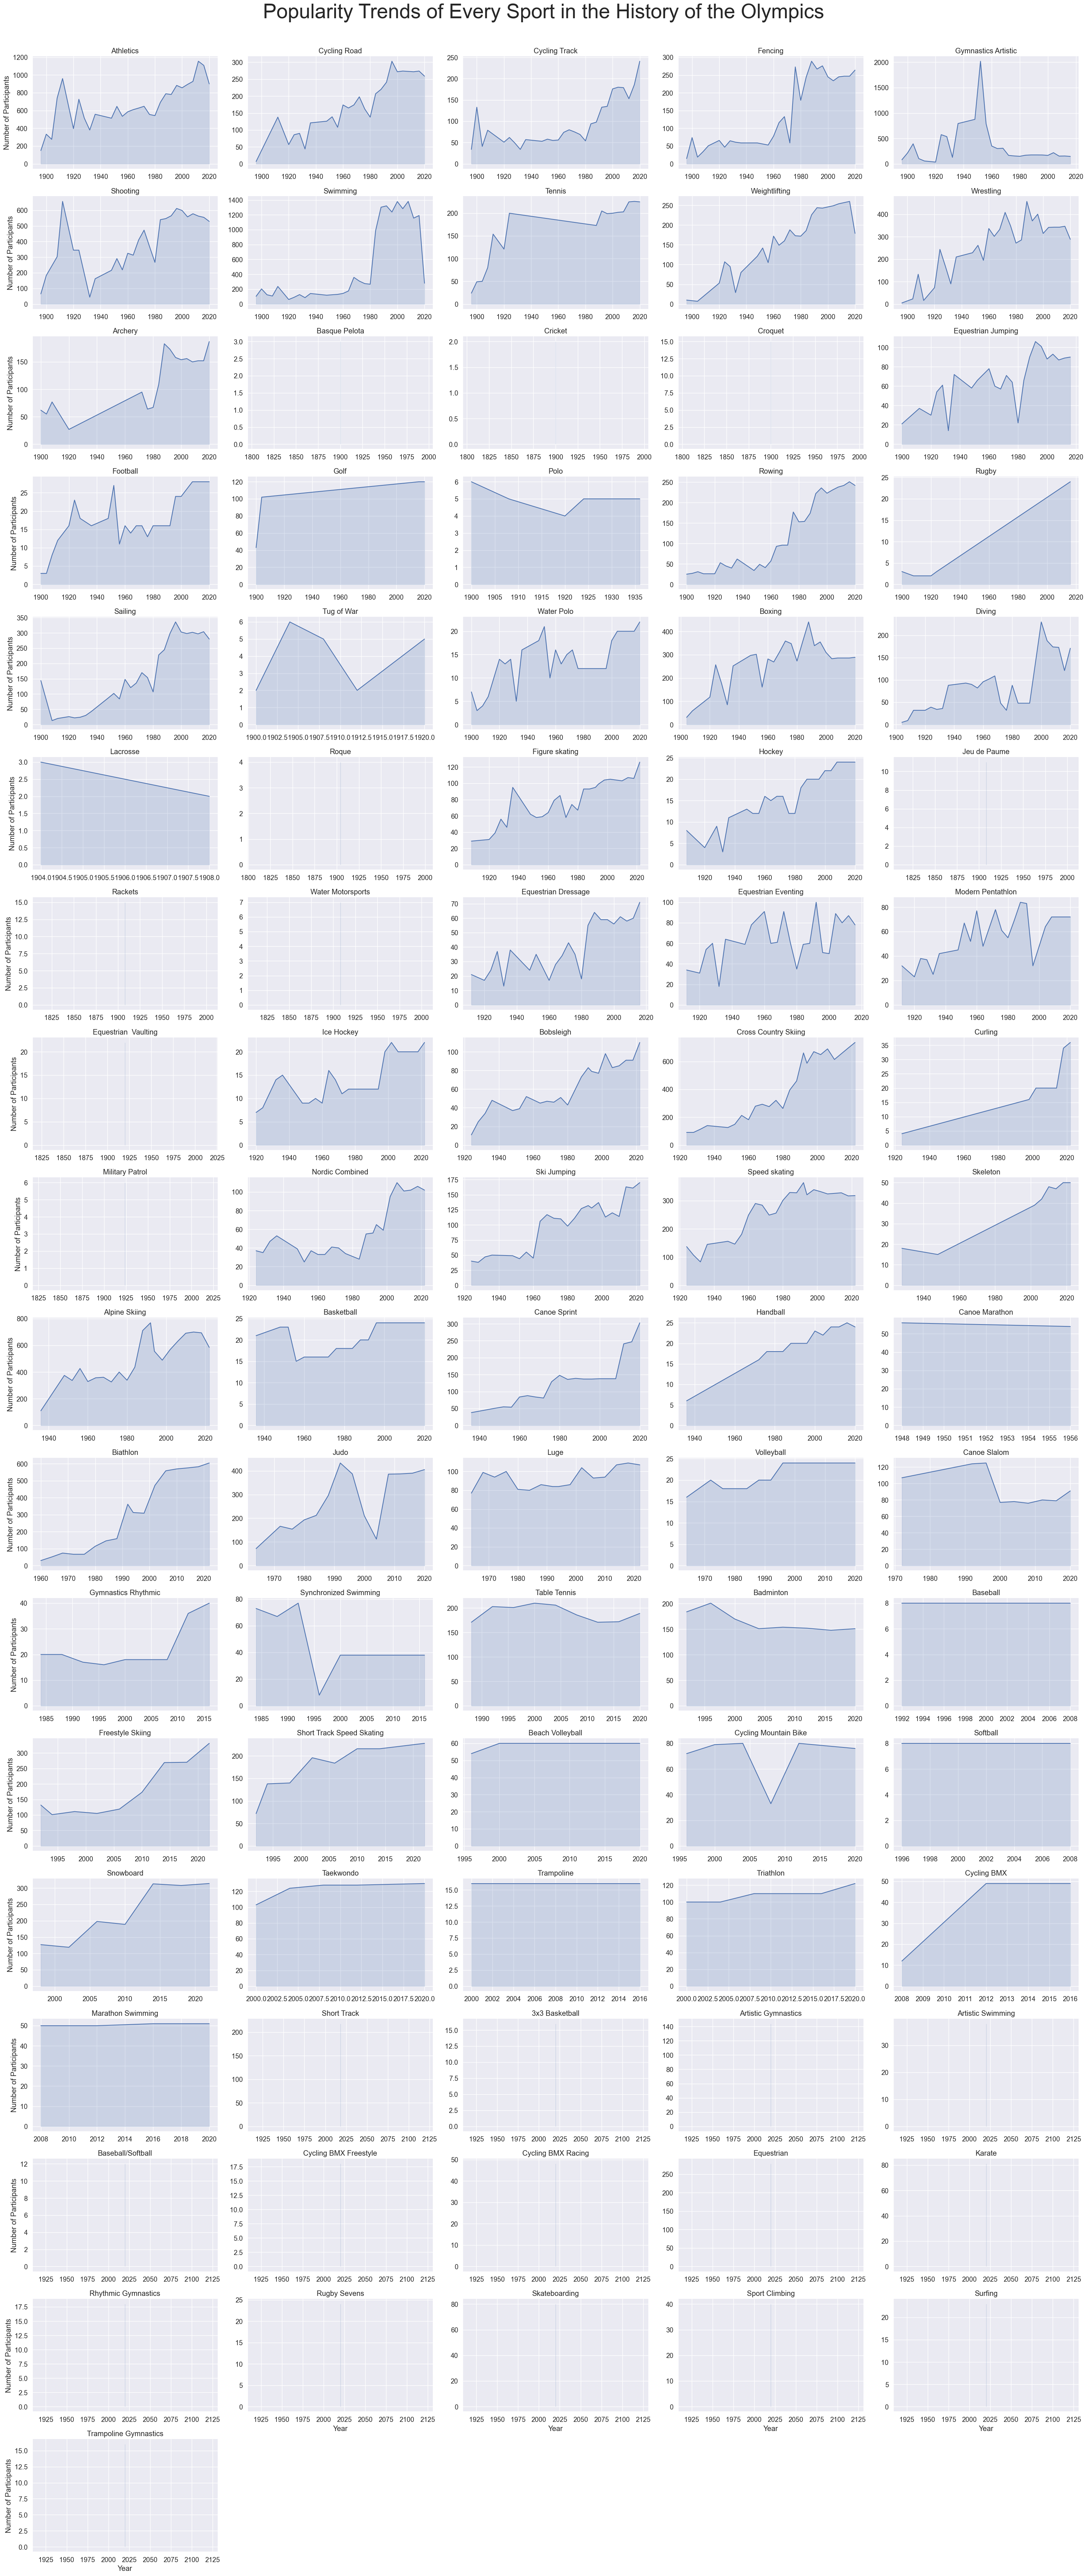

In [21]:
### Since we're going to look at every sport, a facetgrid might be the simplest way of viewing the changes in 
### participants for every sport over the years that they've been actively played.

RQ3_facet = pf.sns.FacetGrid(AllSports_grouped, 
                          col='Sport', 
                          col_wrap=5, 
                          height=4, 
                          aspect=1.5, 
                          sharex=False, 
                          sharey=False, 
                          despine=True)
RQ3_facet = RQ3_facet.map(pf.plt.plot, 
                          'Year', 'Number of Participants')
RQ3_facet = (RQ3_facet.map(pf.plt.fill_between, 
                          'Year', 'Number of Participants', 
                          alpha=0.2)
             .set_titles("{col_name}"))
RQ3_facet.fig.suptitle('Popularity Trends of Every Sport in the History of the Olympics', fontsize=40)
pf.plt.subplots_adjust(top=0.96)

## Observations
There appears to be quite a few sports that did not have a long enough run in the Olympics to plot anything since I have kept the x-axis length consistant. Since I wanted to observe the popularity trends in the number of participants for each sport, I did not share the y-axis scale for each sport so it will show a 'zoomed in' plot of the values that each plot contained. This will only be used to visually observe if there is a positive or negative trend in the popularity and should not be compared to any other plot.

---

# Data analysis Research Question 2:

**Note:** Since the exploratory data analysis section above was all it took to answer my second research question, I will just produce a graph to show the results.

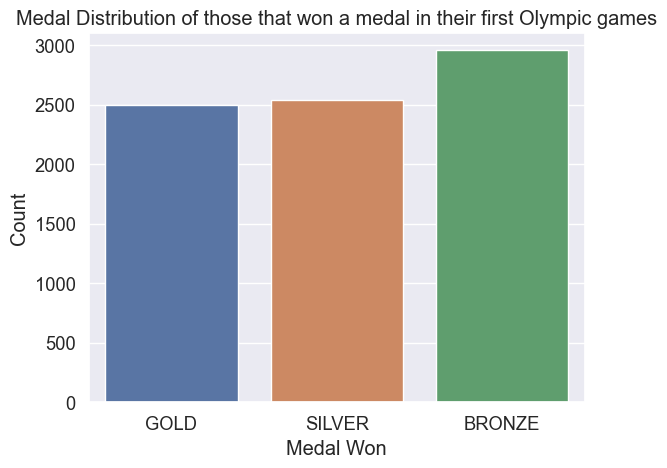

In [22]:
RQ2_plot = pf.sns.countplot(RQ2_First_medal, x= 'Medal Won')
RQ2_plot.set(title= 'Medal Distribution of those that won a medal in their first Olympic games', ylabel='Count')
None

In [23]:
### Finding the percentage of people that won a medal in their first performance

round(len(RQ2_First_medal) / len(Research_df_merged_full), 3) *100

4.8

## Observations
1. After dropping all NaN values in my RQ2_First_medal dataframe, I'm left with 7995 rows meaning there are 7995 Olympic athletes to win an Olympic medal in their first appearance. Based on the number of rows in the unfiltered dataset, the percentage of competitors to win a medal in their first appearance is 4.8%. 

    *Please note that this percentage is **not** the result of finding the individual probability in each sport that an athlete won a medal*
    
1. The medal type distribution is fairly close which is a little unexpected. I expected to see far less gold medals than silver and bronze medals.

---

# Conclusions

In conclusion, the wrangling and cleaning of the four Olympic Games datasets that we found was not too difficult for my research questions. The missing or nan values were taken care of in each dataset in the merging of all of the datasets, and if something still had a nan value, it was important for me to know. The reason it was important for my analysis is because it was important to know if a sport had enough data to show if there was even a popularity trend, as well as if an athlete had won a medal or not.

In my first research question, I asked if there were any popularity trends in sports that could be considered 'similar'. I define 'similarity' between sports loosely since each sport is unique. First I looked at snowboarding and all of the events that involving skiing because those two activities are similar to me in that they both involve moving across/down a mountain. Upon isolating those sports and grouping them by year and sport, I wanted an aggregated count for these conditions which gave me the respective number of competitors in each year, for each sport. This allowed me to find when these sports were first introduced into the Olympics, and how each year compared to one another for each sport. 
In my line plot, it is immediately noticable that the x-axis has a rather non-uniform scale, with years 1940 and 1944 missing and containing no data, along with there being data for years 1992 and 1994, which only has a 2 year difference as opposed to the normal 4 that each olympic games is held. The first anomoly allowed me to deduce that no olympic games were held during years 1940 and 1944 because of World War 2. The second anomoly intrigued me into learning that the International Olympic Committee (IOC) voted to separate the Winter and Summer Games from being held in the same year to rotating between the two every 2 years. 
> In 1986 IOC officials, in response to concerns over the increasing cost and logistic complications of the Olympics, voted to alter the schedule. Only two years separated the 1992 Winter Olympics in Albertville, France, and the 1994 Games in Lillehammer, Norway. Thereafter, the Winter and Summer Games were each held quadrennially, alternating in even-numbered years. ![Source](https://www.britannica.com/sports/Origins-of-the-Olympic-Winter-Games)

It can also be seen that snowboarding was only introduced into the olympics in 1998 but has seen similar numbers in participants as freestyle skiing. Overall, there has been a steadily increasing trend in popularity over time for each of these sports.

I was then interested in learning what kind of trends there were for just the sports that involved skating and if there were any correlations between them. At first glance, there was a sharp increase in participants in short track speed skating between 1992 and 1994, but also we can see that the number of participants in speed skating decreased over the same years. This could suggest a negative correlation between the two events. An assumption could be made that a number of speed skaters switched over to short track speed skating during this time interval. 

Finally, to expand on my first research question, I wanted to visualize the popularity trend for every sport in my dataset to see which sports could be viewed as less popular, average, and more popular. This is a difficult prospect to classify since everyone has different opinions so I did not want to impose my own "what does popular mean" classification into this analysis. Instead, I just wanted to view "how" each sport has historically performed in regards to how many athletes participated in that sport. The large facet grid plot above showcases each sports popularity trend over the time that they were played. By not having a static 'year' scale along the x-axis, it is easier to view how many athletes performed in each year and be able to observe how that sport is viewed not only with the number of participants, but also with the length of time that it was involved with the olympics.

It is easily observable that many sports do not have a visual plot to observe, and this is because these sports were played in only a single year and were then scrapped before the next games. Therefore, they only have a single point in data indicating that these sports were viewed as an unpopular sport and thus not worth funding. 

For my second research question, I wondered how many athletes won a medal the first time they entered an olympic games. I always viewed this as something of a near impossible feat as nerves, unfamiliar location, and many other factors can influence someone in this situation. I found that throughout the history of the olympic games, there have only been 7995 athletes that won a medal in their first time competing. While this say sound like a lot by just viewing the number, this number represents 4.8% of athletes first-time appearances.
